<a href="https://colab.research.google.com/github/fathimajafir/Book-Recommendation-system/blob/main/Container_Terminal_Operation_Sample_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to understand the different container terminal operations. And learn how ML can automate the process and simplifies the logistic system.

##Create dummy vessel data


In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate dummy data for vessel information
np.random.seed(42)
num_records = 10000

vessel_ids = np.arange(1, num_records + 1)
vessel_types = np.random.choice(['Container', 'Tanker', 'Bulk'], num_records)
vessel_lengths = np.random.randint(200, 400, num_records)
vessel_widths = np.random.randint(20, 50, num_records)
origin_ports = np.random.choice(['Port A', 'Port B', 'Port C', 'Port D'], num_records)
destination_ports = np.random.choice(['Port X', 'Port Y', 'Port Z'], num_records)

# Generate dummy data for arrival and departure times
start_date = datetime(2024, 1, 1)
arrival_times = [start_date + timedelta(hours=np.random.randint(0, 24*365)) for _ in range(num_records)]
departure_times = [arrival + timedelta(hours=np.random.randint(1, 72)) for arrival in arrival_times]

# Generate dummy data for cargo information
cargo_types = np.random.choice(['Electronics', 'Oil', 'Grain'], num_records)
cargo_volumes = np.random.randint(5000, 20000, num_records)

# Generate dummy data for weather conditions
weather_conditions = np.random.choice(['Sunny', 'Rainy', 'Cloudy'], num_records)
wind_speeds = np.random.randint(5, 20, num_records)

# Generate dummy data for terminal operation time
terminal_operation_times = np.random.randint(3, 10, num_records)

# Create DataFrame
data = pd.DataFrame({
    'Vessel_ID': vessel_ids,
    'Vessel_Type': vessel_types,
    'Vessel_Length': vessel_lengths,
    'Vessel_Width': vessel_widths,
    'Origin_Port': origin_ports,
    'Destination_Port': destination_ports,
    'Arrival_Time': arrival_times,
    'Departure_Time': departure_times,
    'Cargo_Type': cargo_types,
    'Cargo_Volume': cargo_volumes,
    'Weather_Condition': weather_conditions,
    'Wind_Speed': wind_speeds,
    'Terminal_Operation_Time': terminal_operation_times
})

# Save the dataset to a CSV file
data.to_csv('container_terminal_operations_dataset.csv', index=False)


In [6]:
data

,Vessel_ID,Vessel_Type,Vessel_Length,Vessel_Width,Origin_Port,Destination_Port,Arrival_Time,Departure_Time,Cargo_Type,Cargo_Volume,Weather_Condition,Wind_Speed,Terminal_Operation_Time
0,1,Bulk,342,29,Port A,Port Z,2024-10-06 16:00:00,2024-10-06 18:00:00,Oil,18542,Cloudy,15,9
1,2,Container,345,37,Port A,Port X,2024-05-04 14:00:00,2024-05-07 03:00:00,Oil,15025,Sunny,6,5
2,3,Bulk,281,30,Port B,Port X,2024-11-10 10:00:00,2024-11-10 19:00:00,Oil,17519,Cloudy,10,7
3,4,Bulk,315,26,Port A,Port X,2024-02-26 06:00:00,2024-02-28 09:00:00,Oil,11559,Cloudy,10,6
4,5,Container,304,33,Port A,Port Y,2024-09-21 06:00:00,2024-09-21 08:00:00,Oil,6147,Rainy,18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Bulk,262,36,Port D,Port Y,2024-01-16 16:00:00,2024-01-18 12:00:00,Grain,18407,Rainy,12,4
9996,9997,Container,347,30,Port D,Port Z,2024-09-25 02:00:00,2024-09-26 14:00:00,Electronics,16230,Rainy,17,5
9997,9998,Tanker,391,28,Port A,Port Y,2024-11-13 12:00:00,2024-11-15 19:00:00,Grain,6481,Sunny,9,4
9998,9999,Tanker,236,46,Port C,Port Z,2024-09-27 05:00:00,2024-09-30 04:00:00,Electronics,19513,Rainy,14,5


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


##Exploratory Data Analysis

In [8]:
data.head(5)

,Vessel_ID,Vessel_Type,Vessel_Length,Vessel_Width,Origin_Port,Destination_Port,Arrival_Time,Departure_Time,Cargo_Type,Cargo_Volume,Weather_Condition,Wind_Speed,Terminal_Operation_Time
0,1,Bulk,342,29,Port A,Port Z,2024-10-06 16:00:00,2024-10-06 18:00:00,Oil,18542,Cloudy,15,9
1,2,Container,345,37,Port A,Port X,2024-05-04 14:00:00,2024-05-07 03:00:00,Oil,15025,Sunny,6,5
2,3,Bulk,281,30,Port B,Port X,2024-11-10 10:00:00,2024-11-10 19:00:00,Oil,17519,Cloudy,10,7
3,4,Bulk,315,26,Port A,Port X,2024-02-26 06:00:00,2024-02-28 09:00:00,Oil,11559,Cloudy,10,6
4,5,Container,304,33,Port A,Port Y,2024-09-21 06:00:00,2024-09-21 08:00:00,Oil,6147,Rainy,18,7


In [9]:
data.describe()

,Vessel_ID,Vessel_Length,Vessel_Width,Arrival_Time,Departure_Time,Cargo_Volume,Wind_Speed,Terminal_Operation_Time
count,10000.00000,10000.000000,10000.000000,10000,10000,10000.000000,10000.00000,10000.000000
mean,5000.50000,298.099600,34.350900,2024-07-01 06:03:21.600000256,2024-07-02 17:50:23.280000,12491.385200,11.99320,5.976300
min,1.00000,200.000000,20.000000,2024-01-01 00:00:00,2024-01-01 08:00:00,5000.000000,5.00000,3.000000
25%,2500.75000,248.000000,27.000000,2024-03-30 17:00:00,2024-03-31 23:00:00,8777.000000,8.00000,4.000000
50%,5000.50000,297.000000,34.000000,2024-07-01 19:30:00,2024-07-03 12:30:00,12534.000000,12.00000,6.000000
75%,7500.25000,348.000000,42.000000,2024-10-01 12:15:00,2024-10-02 19:15:00,16242.250000,16.00000,8.000000
max,10000.00000,399.000000,49.000000,2024-12-30 23:00:00,2025-01-02 15:00:00,19995.000000,19.00000,9.000000
std,2886.89568,57.889227,8.607751,NaN,NaN,4316.958806,4.31896,2.010757


In [13]:
# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=np.number)

# Correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


                         Vessel_ID  Vessel_Length  Vessel_Width  Cargo_Volume  \
Vessel_ID                 1.000000       0.009308      0.003332     -0.003746   
Vessel_Length             0.009308       1.000000     -0.007861     -0.014468   
Vessel_Width              0.003332      -0.007861      1.000000     -0.007766   
Cargo_Volume             -0.003746      -0.014468     -0.007766      1.000000   
Wind_Speed                0.008001      -0.005363     -0.005577      0.012732   
Terminal_Operation_Time   0.013451      -0.006823     -0.019553      0.025891   

                         Wind_Speed  Terminal_Operation_Time  
Vessel_ID                  0.008001                 0.013451  
Vessel_Length             -0.005363                -0.006823  
Vessel_Width              -0.005577                -0.019553  
Cargo_Volume               0.012732                 0.025891  
Wind_Speed                 1.000000                -0.010418  
Terminal_Operation_Time   -0.010418                 1.

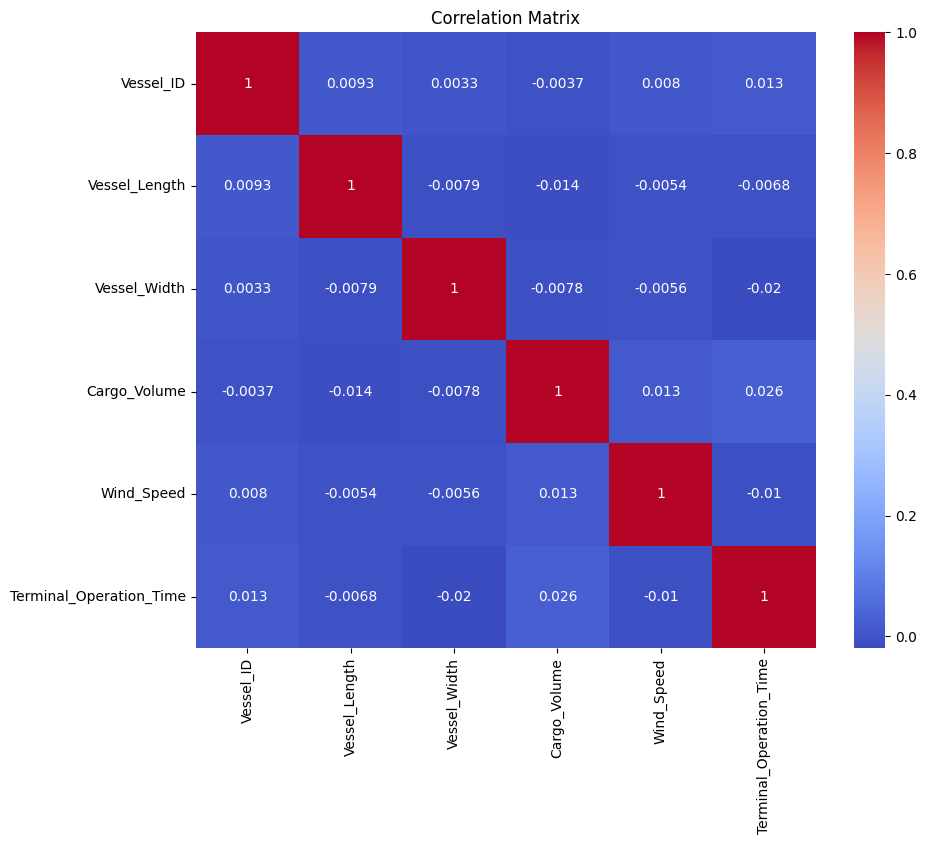

In [14]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

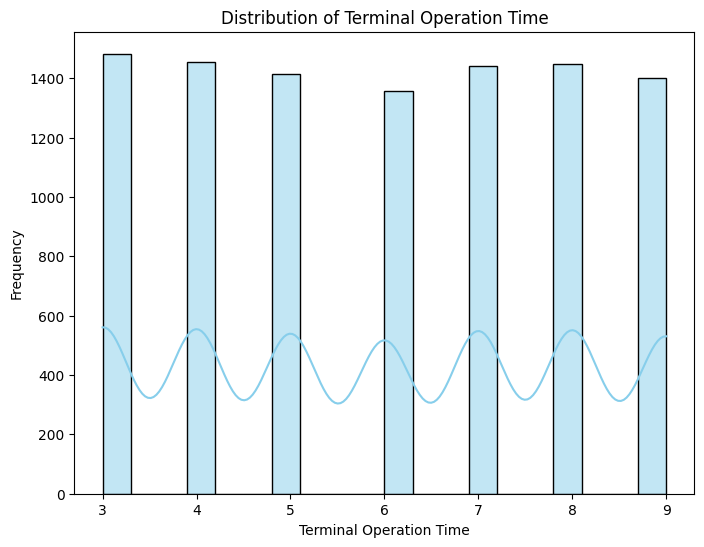

In [11]:
# Distribution of Terminal_Operation_Time
plt.figure(figsize=(8, 6))
sns.histplot(data['Terminal_Operation_Time'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Terminal Operation Time')
plt.xlabel('Terminal Operation Time')
plt.ylabel('Frequency')
plt.show()

##Feature Engineering

In [18]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Vessel_Type', 'Cargo_Type', 'Weather_Condition', 'Origin_Port', 'Destination_Port'])

In [19]:
# Split features and target variable
X = data.drop('Terminal_Operation_Time', axis=1)
y = data['Terminal_Operation_Time']

In [20]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Select only numeric columns for feature scaling
numeric_columns = X_train.select_dtypes(include=np.number)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(numeric_columns)
X_test_scaled = scaler.transform(X_test[numeric_columns.columns])  # Scale test set using the same scaler as train set


##Apply Different Machine Learning Models

In [23]:
#Linear Regression
# Initialize and train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)




LinearRegression()

In [24]:
# Predict terminal operation time on test set
y_pred_lr = model_lr.predict(X_test_scaled)

In [25]:
#Decision Tree Regression
# Initialize and train the decision tree regression model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_scaled, y_train)



DecisionTreeRegressor(random_state=42)

In [26]:

# Predict terminal operation time on test set
y_pred_dt = model_dt.predict(X_test_scaled)

In [27]:
#Random Forest Regression
# Initialize and train the random forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)



RandomForestRegressor(random_state=42)

In [28]:
# Predict terminal operation time on test set
y_pred_rf = model_rf.predict(X_test_scaled)


In [31]:
from sklearn.linear_model import Ridge

# Initialize and train the ridge regression model
model_ridge = Ridge(alpha=1.0, random_state=42)
model_ridge.fit(X_train_scaled, y_train)





Ridge(random_state=42)

In [33]:
y_pred_ridge = model_ridge.predict(X_test_scaled)

In [35]:
#neural network model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the neural network model
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50),  # Specify the number of neurons in each hidden layer
                        activation='relu',  # Activation function for hidden layers
                        solver='adam',  # Optimization algorithm
                        max_iter=1000,  # Maximum number of iterations
                        random_state=42)  # Random seed for reproducibility
model_nn.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [36]:
y_pred_nn = model_nn.predict(X_test_scaled)

In [37]:
# Evaluate linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Mean Squared Error (Linear Regression):', mse_lr)

# Evaluate decision tree regression model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Mean Squared Error (Decision Tree Regression):', mse_dt)

# Evaluate random forest regression model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error (Random Forest Regression):', mse_rf)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error (Ridge Regression):', mse_ridge)

mse_nn = mean_squared_error(y_test, y_pred_nn)
print('Mean Squared Error (Neural Network):', mse_nn)

Mean Squared Error (Linear Regression): 4.049023939865382
Mean Squared Error (Decision Tree Regression): 7.977
Mean Squared Error (Random Forest Regression): 4.312111649999999
Mean Squared Error (Ridge Regression): 4.04902263899272
Mean Squared Error (Neural Network): 4.201876343889897


In conclusion, Linear Regression and Ridge Regression seem to be the most suitable models for this particular problem, given their relatively low MSE and simplicity. However, further experimentation and fine-tuning may be beneficial, especially for the neural network model, to potentially improve its performance.